In [3]:
%matplotlib inline
import pandas as pd

In [4]:
title = pd.read_csv(r"C:\Users\hp\Desktop\practice exercises\Python-S1\titles.csv", index_col=None)
title.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [5]:
cast = pd.read_csv(r"C:\Users\hp\Desktop\practice exercises\Python-S1\cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


# Using groupby(), plot the number of films that have been released each decade in the history of cinema.

<function matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)>

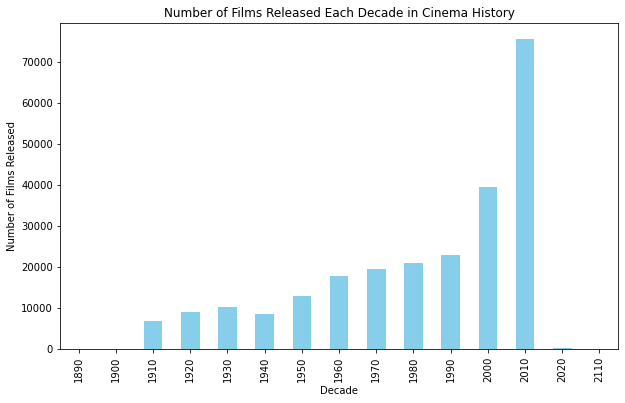

In [7]:
import matplotlib.pyplot as plt

title['year'] = title['year'].fillna(0).astype(int)

title['decade'] = (title['year'] // 10) * 10

film_count_by_decade = title.groupby('decade')['title'].count()

plt.figure(figsize=(10, 6))
film_count_by_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Films Released')
plt.title('Number of Films Released Each Decade in Cinema History')
plt.xticks

# Use groupby() to plot the number of "Hamlet" films made each decade.

<AxesSubplot:title={'center':'Number of "Hamlet" Films per Decade'}, xlabel='decade'>

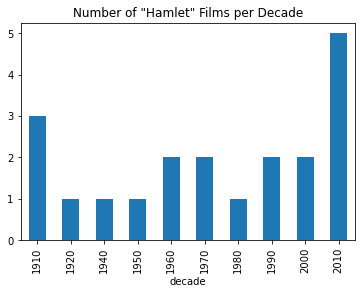

In [9]:
title['decade'] = title['year'] // 10 * 10

hamlet_by_decade = title[title['title'] == 'Hamlet'].groupby('decade').size()

hamlet_by_decade.plot(kind='bar', title='Number of "Hamlet" Films per Decade')

# How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [10]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

leading_roles_1950s = roles_1950s[roles_1950s['n'] == 1].groupby('type')['n'].count()

print(leading_roles_1950s)

type
actor      6692
actress    3040
Name: n, dtype: int64


# In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [11]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

roles_by_n_1950s = roles_1950s.groupby(['type', 'n'])['n'].count()

print(roles_by_n_1950s)

type     n    
actor    1.0      6692
         2.0      4640
         3.0      5654
         4.0      5663
         5.0      5674
                  ... 
actress  162.0       1
         163.0       1
         164.0       1
         418.0       1
         788.0       1
Name: n, Length: 260, dtype: int64


# Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [12]:
pink_panther_movies = cast[cast['title'].str.contains('Pink Panther', case=False)]

roles_count_per_movie = pink_panther_movies.groupby('title')['character'].count().reset_index()

print(roles_count_per_movie)

                            title  character
0       Curse of the Pink Panther         67
1     Revenge of the Pink Panther         68
2         Son of the Pink Panther         46
3                The Pink Panther        111
4              The Pink Panther 2         84
5  The Pink Panther Strikes Again         70
6  The Return of the Pink Panther         30
7       Trail of the Pink Panther         41


# List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [14]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

roles_count_for_frank_oz = frank_oz_roles.groupby('title')['character'].count().reset_index()

multiple_roles_movies = roles_count_for_frank_oz[roles_count_for_frank_oz['character'] > 1]

result = multiple_roles_movies.merge(title, on='title')

result = result.sort_values(by='year')

print(result)

                                  title  character  year  decade
8                      The Muppet Movie          8  1979    1970
0        An American Werewolf in London          2  1981    1980
6                The Great Muppet Caper          6  1981    1980
5                      The Dark Crystal          2  1982    1980
9            The Muppets Take Manhattan          7  1984    1980
1                      Follow That Bird          3  1985    1980
7            The Muppet Christmas Carol          7  1992    1990
2                Muppet Treasure Island          4  1996    1990
3                    Muppets from Space          4  1999    1990
4  The Adventures of Elmo in Grouchland          3  1999    1990


# List each of the characters that Frank Oz has portrayed at least twice

In [15]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']

character_counts = frank_oz_roles['character'].value_counts()

characters_appeared_twice_or_more = character_counts[character_counts >= 2]

characters_appeared_twice_or_more.index.tolist()

['Miss Piggy',
 'Yoda',
 'Animal',
 'Cookie Monster',
 'Sam the Eagle',
 'Fozzie Bear',
 'Bert',
 'Grover']